In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.10 [186 kB]
Fetched 186 kB in 16s (11.6 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.10_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.10) ...
Setting up poppler-utils (22.02.0-2ubuntu0.10) ...
Processing triggers for man-db (2.10.2-1) ...
Mounted at /content/drive
--- Starting Milestone 1, Week 1 (with PDF Support) ---

Scanning folders for images and PDFs to create the dataset...
Images from PDFs will be saved in: /co

9it [00:02,  3.91it/s]



Scan and conversion complete. Found 358 total images (including PDF pages).
Successfully created and saved 'scanner_dataset.csv' to your project folder!

Unique Scanner Models Found:
scanner_model
EpsonV370-1    88
Canon120-1     73
Canon9000-1    56
EpsonV39-1     52
HP             34
Canon220       31
EpsonV550      24
Name: count, dtype: int64


--- Analyzing a sample image ---
Analyzing: /content/drive/MyDrive/SUPERLANTIQUE_FOLDER/SUPATLANTIQUE/Flatfield/Flatfield/Canon220/300.tif
Resolution: 2480 x 3508
Number of Channels: 3
Data Type: uint8


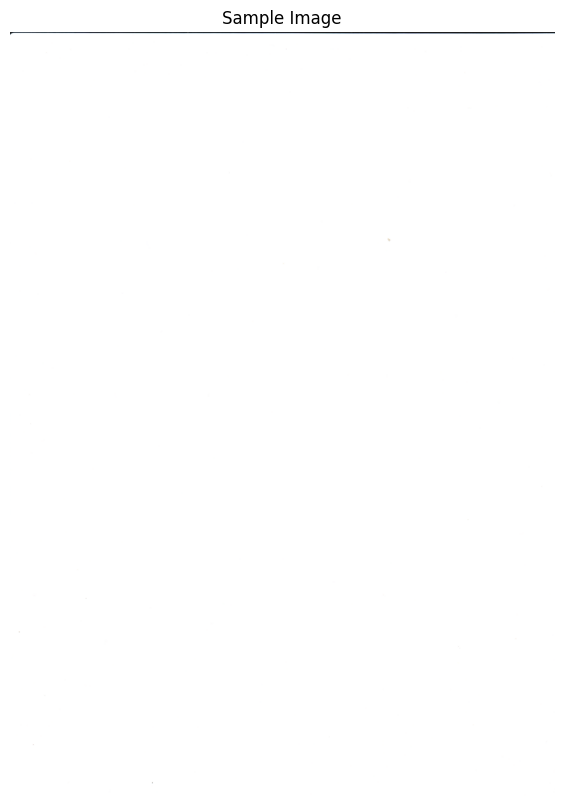


--- Week 1 Complete ---


In [ ]:
# First, install the necessary libraries for PDF conversion
!pip install pdf2image
# This next command installs the underlying dependency for pdf2image in Colab
!apt-get install -y poppler-utils

import pandas as pd
import numpy as np
import cv2
import os
from google.colab import drive
from tqdm import tqdm
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

# --- Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)

# --- CONFIGURATION ---
PROJECT_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER"
# ==================================================================================

print("--- Starting Milestone 1, Week 1 (with PDF Support) ---")

# --- Task 1: Create a Labeled Dataset ---
print("\nScanning folders for images and PDFs to create the dataset...")

images_base_path = os.path.join(PROJECT_PATH, "SUPATLANTIQUE", "Flatfield")
converted_pdf_path = os.path.join(PROJECT_PATH, "PDF_CONVERTED_IMAGES")
os.makedirs(converted_pdf_path, exist_ok=True)
print(f"Images from PDFs will be saved in: {converted_pdf_path}")

image_paths = []
labels = []

for dirpath, dirnames, filenames in tqdm(os.walk(images_base_path)):
    scanner_model_label = os.path.basename(dirpath)
    if scanner_model_label != "Flatfield":
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            if filename.lower().endswith(('.tif', '.tiff', '.png', '.jpg', '.jpeg')):
                image_paths.append(file_path)
                labels.append(scanner_model_label)
            elif filename.lower().endswith('.pdf'):
                try:
                    pages = convert_from_path(file_path, 300)
                    for i, page in enumerate(pages):
                        new_image_name = f"{os.path.splitext(filename)[0]}_page_{i+1}.png"
                        new_image_path = os.path.join(converted_pdf_path, new_image_name)
                        page.save(new_image_path, 'PNG')
                        image_paths.append(new_image_path)
                        labels.append(scanner_model_label)
                except Exception as e:
                    print(f"\nCould not process PDF {file_path}. Error: {e}")

df = pd.DataFrame({'file_path': image_paths, 'scanner_model': labels})
csv_path = os.path.join(PROJECT_PATH, "scanner_dataset.csv")
df.to_csv(csv_path, index=False)

print(f"\nScan and conversion complete. Found {len(df)} total images (including PDF pages).")
print(f"Successfully created and saved 'scanner_dataset.csv' to your project folder!")

if not df.empty:
    print("\nUnique Scanner Models Found:")
    print(df['scanner_model'].value_counts())

    # --- Task 2: Analyze Basic Image Properties ---
    print("\n\n--- Analyzing a sample image ---")
    sample_path = df['file_path'].iloc[0]
    print(f"Analyzing: {sample_path}")

    try:
        sample_image = cv2.imread(sample_path, cv2.IMREAD_UNCHANGED)
        if sample_image is not None:
            # ✅ FIX: Added logic to handle both grayscale and color images
            if len(sample_image.shape) == 2:
                # This is a grayscale image
                height, width = sample_image.shape
                channels = 1
                display_image = sample_image
                cmap = 'gray'
            else:
                # This is a color image
                height, width, channels = sample_image.shape
                # Convert from BGR (OpenCV) to RGB (Matplotlib) for correct color
                display_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
                cmap = None

            print(f"Resolution: {width} x {height}")
            print(f"Number of Channels: {channels}")
            print(f"Data Type: {sample_image.dtype}")

            plt.figure(figsize=(8, 10))
            plt.imshow(display_image, cmap=cmap)
            plt.title("Sample Image")
            plt.axis('off')
            plt.show()
        else:
            print("Could not read the sample image.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Dataset is empty.")

print("\n--- Week 1 Complete ---")

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from google.colab import drive

# --- Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)

# --- CONFIGURATION ---
PROJECT_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER"
IMG_SIZE = 256 # We will resize all images to a standard 256x256
# ===================================================================================

print("--- Starting Milestone 1, Week 2 ---")

# --- Function Definition ---
def preprocess_image(image_path):
    """Loads an image, converts it to grayscale, resizes, and normalizes it."""
    try:
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Could not read image at {image_path}")
            return None

        # Convert to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize the image to our standard size
        img_resized = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))

        # Normalize pixel values to be between 0.0 and 1.0
        img_normalized = img_resized / 255.0

        return img_normalized
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# --- Script Execution ---
print("\n--- Testing the preprocessing function ---")

# Load the CSV file we created in Week 1
csv_path = os.path.join(PROJECT_PATH, "scanner_dataset.csv")
df = pd.read_csv(csv_path)

if not df.empty:
    # Get the path of a sample image from our dataset
    sample_path = df['file_path'].iloc[0]
    print(f"Processing sample image: {sample_path}")

    # Process the image using our new function
    processed_sample = preprocess_image(sample_path)

    if processed_sample is not None:
        print("\nSuccess! Image processed correctly.")
        print(f"Shape after processing: {processed_sample.shape}")
        print(f"Data type after processing: {processed_sample.dtype}")
        print(f"Pixel value range: {processed_sample.min()} to {processed_sample.max()}")
    else:
        print("Failed to process the sample image.")
else:
    print("Dataset CSV is empty. Cannot test preprocessing.")

print("\n--- Week 2 Complete ---")

Mounted at /content/drive
--- Starting Milestone 1, Week 2 ---

--- Testing the preprocessing function ---
Processing sample image: /content/drive/MyDrive/SUPERLANTIQUE_FOLDER/SUPATLANTIQUE/Flatfield/Flatfield/Canon220/300.tif

Success! Image processed correctly.
Shape after processing: (256, 256)
Data type after processing: float64
Pixel value range: 0.23529411764705882 to 1.0

--- Week 2 Complete ---


Mounted at /content/drive
--- Starting Milestone 2, Week 3 ---

--- Testing the feature extraction function ---
Extracting LBP features from sample: /content/drive/MyDrive/SUPERLANTIQUE_FOLDER/SUPATLANTIQUE/Flatfield/Flatfield/Canon220/300.tif


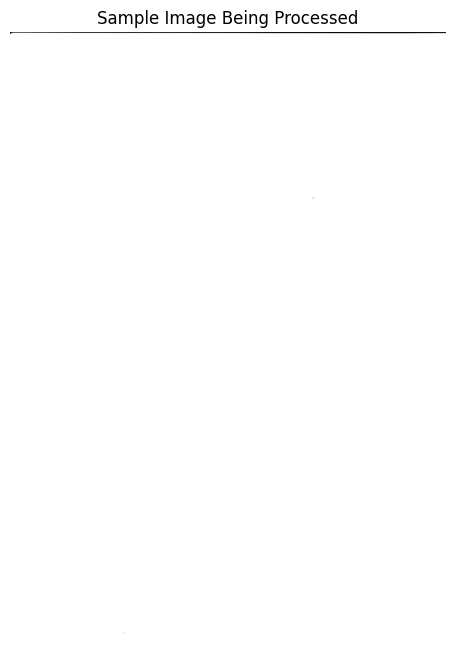


Success! LBP feature vector extracted.
Length of the feature vector: 26
Here's a preview of the vector (first 10 values):
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.52587891e-05 7.62939453e-05
 1.37329102e-04 2.28881836e-04]

--- Week 3 Complete ---


In [ ]:
# First, ensure scikit-image is installed
!pip install scikit-image

import pandas as pd
import numpy as np
import cv2
import os
from google.colab import drive
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt # ✅ NEW: Import for plotting

# --- Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)

# --- CONFIGURATION ---
PROJECT_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER"
IMG_SIZE = 256
# ===================================================================================

print("--- Starting Milestone 2, Week 3 ---")

# --- Function for Feature Extraction ---
def extract_lbp_features(image_path):
    """Loads an image, displays it, and extracts LBP features."""
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None: return None, None

        # ✅ NEW: Display the image
        plt.figure(figsize=(6, 8))
        plt.imshow(img, cmap='gray')
        plt.title("Sample Image Being Processed")
        plt.axis('off')
        plt.show()

        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        radius = 3
        n_points = 8 * radius
        lbp = local_binary_pattern(img_resized, n_points, radius, method='uniform')

        (hist, _) = np.histogram(lbp.ravel(),
                                 bins=np.arange(0, n_points + 3),
                                 range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)

        return hist
    except Exception as e:
        print(f"Error extracting features from {image_path}: {e}")
        return None

# --- Script Execution ---
print("\n--- Testing the feature extraction function ---")

csv_path = os.path.join(PROJECT_PATH, "scanner_dataset.csv")
df = pd.read_csv(csv_path)

if not df.empty:
    sample_path = df['file_path'].iloc[0]
    print(f"Extracting LBP features from sample: {sample_path}")

    lbp_features = extract_lbp_features(sample_path)

    if lbp_features is not None:
        print("\nSuccess! LBP feature vector extracted.")
        print(f"Length of the feature vector: {len(lbp_features)}")
        print("Here's a preview of the vector (first 10 values):")
        print(lbp_features[:10])
    else:
        print("Failed to extract features from the sample image.")
else:
    print("Dataset CSV is empty. Cannot test feature extraction.")

print("\n--- Week 3 Complete ---")

Mounted at /content/drive
--- Starting Milestone 2, Week 4 ---
Loaded 358 image records from the CSV.

Extracting LBP features from all images...


100%|██████████| 358/358 [13:17<00:00,  2.23s/it]



Successfully processed 357 images.
Data split into 285 training and 72 testing samples.

Training the Random Forest model...
Evaluating model performance...

--- MODEL RESULTS ---
Baseline Model Accuracy: 75.00%

Classification Report:
              precision    recall  f1-score   support

  Canon120-1       0.53      0.80      0.64        10
    Canon220       0.25      0.14      0.18         7
 Canon9000-1       0.80      0.73      0.76        11
 EpsonV370-1       0.95      1.00      0.97        18
  EpsonV39-1       0.64      0.64      0.64        14
   EpsonV550       1.00      0.60      0.75         5
          HP       1.00      1.00      1.00         7

    accuracy                           0.75        72
   macro avg       0.74      0.70      0.71        72
weighted avg       0.75      0.75      0.74        72


Generating Confusion Matrix...


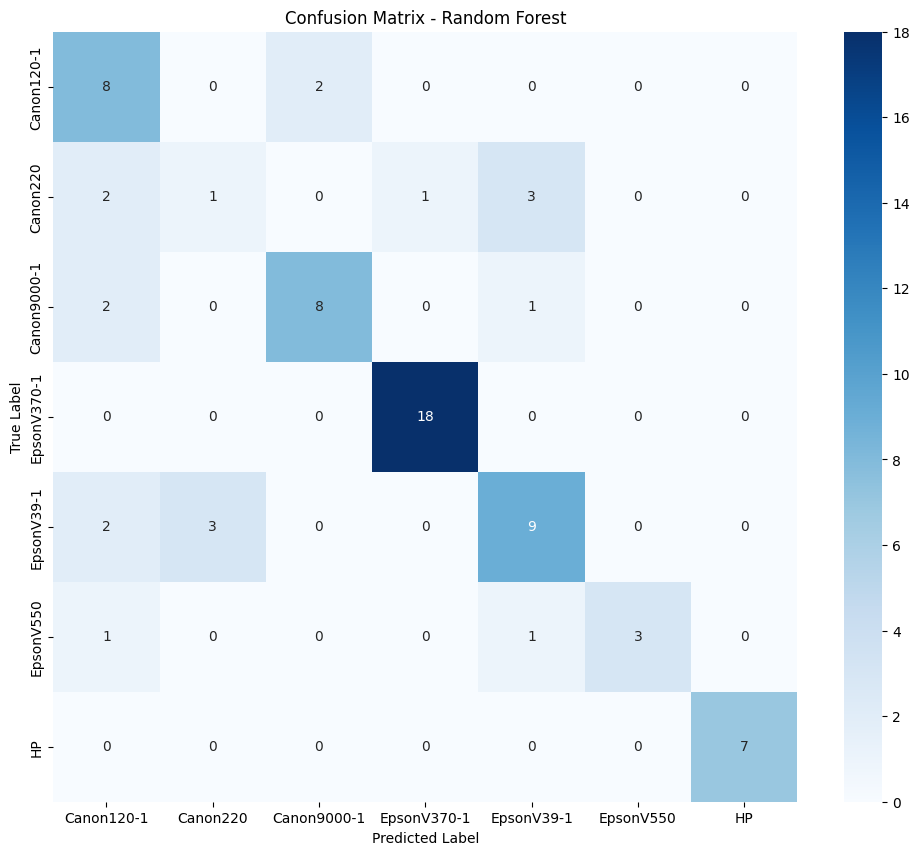


--- Week 4 Complete ---


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from google.colab import drive
from skimage.feature import local_binary_pattern
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)

# --- CONFIGURATION ---
PROJECT_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER"
IMG_SIZE = 256
# ===================================================================================

print("--- Starting Milestone 2, Week 4 ---")

# --- Function from Week 3 ---
def extract_lbp_features(image_path):
    """Loads an image and extracts LBP features without displaying it."""
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None: return None
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        radius = 3
        n_points = 8 * radius
        lbp = local_binary_pattern(img_resized, n_points, radius, method='uniform')
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        return hist
    except Exception as e:
        return None

# --- Script Execution ---
# 1. Load the dataset CSV
csv_path = os.path.join(PROJECT_PATH, "scanner_dataset.csv")
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} image records from the CSV.")

# 2. Process all images and extract features
print("\nExtracting LBP features from all images...")
features_list = []
labels_list = []

for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    features = extract_lbp_features(row['file_path'])
    if features is not None:
        features_list.append(features)
        labels_list.append(row['scanner_model'])

X = np.array(features_list)
y = np.array(labels_list)
print(f"\nSuccessfully processed {len(X)} images.")

# 3. Encode string labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)
print(f"Data split into {len(X_train)} training and {len(X_test)} testing samples.")

# 5. Train the Random Forest model
print("\nTraining the Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 6. Evaluate the model on the test data
print("Evaluating model performance...")
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n--- MODEL RESULTS ---")
print(f"Baseline Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
# We get the unique labels present in the combined train/test sets for the report
report_labels = np.unique(np.concatenate((y_train, y_test)))
report_target_names = le.inverse_transform(report_labels)
print(classification_report(y_test, y_pred, labels=report_labels, target_names=report_target_names, zero_division=0))

# 7. Visualize the Confusion Matrix
print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
# Use the same unique labels for the heatmap for consistency
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=report_target_names, yticklabels=report_target_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n--- Week 4 Complete ---")

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from google.colab import drive
from skimage.feature import local_binary_pattern
from tqdm import tqdm

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# --- Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)

# --- CONFIGURATION ---
PROJECT_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER"
IMG_SIZE = 256
# ===================================================================================

print("--- Starting Hyperparameter Tuning for Random Forest ---")

# --- Function from Week 3 ---
def extract_lbp_features(image_path):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None: return None
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        radius = 3
        n_points = 8 * radius
        lbp = local_binary_pattern(img_resized, n_points, radius, method='uniform')
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        return hist
    except Exception as e:
        return None

# --- Script Execution ---
# 1. Load data and extract features (same as Week 4)
csv_path = os.path.join(PROJECT_PATH, "scanner_dataset.csv")
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} image records.")

print("\nExtracting LBP features from all images...")
features_list = []
labels_list = []
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    features = extract_lbp_features(row['file_path'])
    if features is not None:
        features_list.append(features)
        labels_list.append(row['scanner_model'])

X = np.array(features_list)
y = np.array(labels_list)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nSuccessfully processed {len(X)} images.")

# We use the full dataset for Grid Search to find the best params
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)

# --- 2. Define the Hyperparameter Grid ---
# We'll test a few combinations of key parameters.
param_grid = {
    'n_estimators': [100, 200],      # Number of trees in the forest
    'max_depth': [10, 20, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5],     # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2]       # Minimum number of samples required at a leaf node
}

# --- 3. Set up and Run GridSearchCV ---
print("\nStarting GridSearchCV... This will take several minutes.")
rf = RandomForestClassifier(random_state=42)
# cv=3 means 3-fold cross-validation. n_jobs=-1 uses all available CPU cores.
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# --- 4. Display the Best Results ---
print("\n--- TUNING COMPLETE ---")
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Let's see how a model with these best parameters performs on our test set
print("\n--- Evaluating the Tuned Model ---")
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy of the tuned model on the test set: {tuned_accuracy * 100:.2f}%")

Mounted at /content/drive
--- Starting Hyperparameter Tuning for Random Forest ---
Loaded 358 image records.

Extracting LBP features from all images...


100%|██████████| 358/358 [00:56<00:00,  6.35it/s]


Successfully processed 357 images.

Starting GridSearchCV... This will take several minutes.
Fitting 3 folds for each of 24 candidates, totalling 72 fits



--- TUNING COMPLETE ---
Best parameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

--- Evaluating the Tuned Model ---

Accuracy of the tuned model on the test set: 69.44%


Mounted at /content/drive
--- Starting Milestone 3, Week 5 (Corrected) ---

Loading and preprocessing images for the CNN...


100%|██████████| 358/358 [00:31<00:00, 11.51it/s]



Successfully loaded and processed 357 images.
Data split into 285 training and 72 testing samples.

--- Setting up data augmentation ---

--- Building the CNN Model using the Functional API ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,735 (14.14 MB)

 Trainable params: 3,705,735 (14.14 MB)

 Non-trainable params: 0 (0.00 B)


--- Training the CNN Model with Augmented Data ---
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 - 10s - 1s/step - accuracy: 0.1579 - loss: 2.4145 - val_accuracy: 0.2500 - val_loss: 1.8886
Epoch 2/50
9/9 - 6s - 660ms/step - accuracy: 0.1825 - loss: 1.9351 - val_accuracy: 0.2500 - val_loss: 1.8947
Epoch 3/50
9/9 - 8s - 878ms/step - accuracy: 0.2211 - loss: 1.8951 - val_accuracy: 0.2500 - val_loss: 1.8571
Epoch 4/50
9/9 - 6s - 685ms/step - accuracy: 0.2316 - loss: 1.9303 - val_accuracy: 0.2500 - val_loss: 1.8624
Epoch 5/50
9/9 - 8s - 895ms/step - accuracy: 0.2140 - loss: 1.8997 - val_accuracy: 0.2778 - val_loss: 1.8901
Epoch 6/50
9/9 - 6s - 695ms/step - accuracy: 0.2316 - loss: 1.8681 - val_accuracy: 0.2500 - val_loss: 1.8682
Epoch 7/50
9/9 - 8s - 870ms/step - accuracy: 0.2316 - loss: 1.8571 - val_accuracy: 0.2778 - val_loss: 1.8612
Epoch 8/50
9/9 - 6s - 662ms/step - accuracy: 0.2105 - loss: 1.8317 - val_accuracy: 0.2083 - val_loss: 1.9252
Epoch 9/50
9/9 - 8s - 865ms/step - accuracy: 0.2421 - loss: 1.8508 - val_accuracy: 0.2778 - val_loss: 1.8983
Epoch 10/50
9/9 - 6s - 691ms/ste

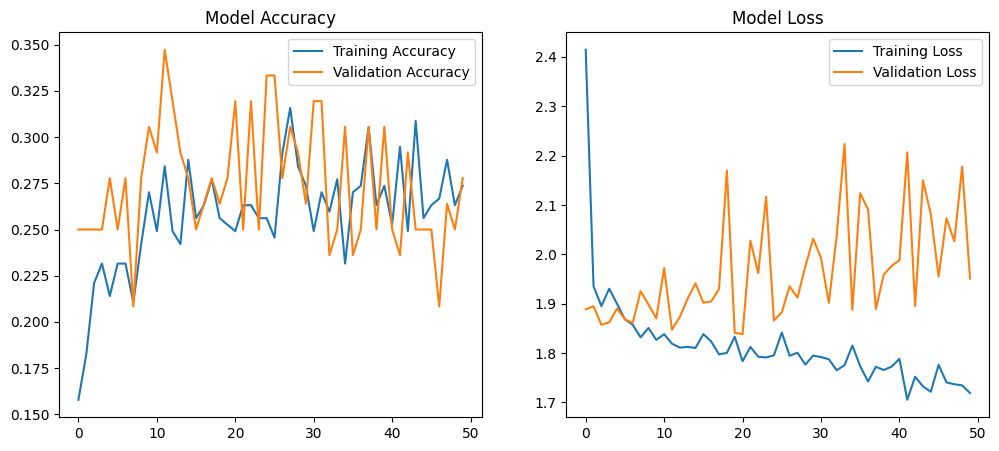


--- Week 5 Complete ---


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from google.colab import drive
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
# ✅ CHANGE: Importing Model and Input for the Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)

# --- CONFIGURATION ---
PROJECT_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER"
IMG_SIZE = 128
# ===================================================================================

print("--- Starting Milestone 3, Week 5 (Corrected) ---")

# --- DATA LOADING & PREPROCESSING ---
print("\nLoading and preprocessing images for the CNN...")
csv_path = os.path.join(PROJECT_PATH, "scanner_dataset.csv")
df = pd.read_csv(csv_path)

images = []
labels = []

for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    try:
        img = cv2.imread(row['file_path'], cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img_resized)
            labels.append(row['scanner_model'])
    except Exception as e:
        print(f"Skipping file {row['file_path']} due to error: {e}")

X = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array(labels)
print(f"\nSuccessfully loaded and processed {len(X)} images.")

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)
num_classes = len(le.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.20, random_state=42, stratify=y_categorical)
print(f"Data split into {len(X_train)} training and {len(X_test)} testing samples.")

# --- DATA AUGMENTATION SETUP ---
print("\n--- Setting up data augmentation ---")
datagen = ImageDataGenerator(
    rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
    zoom_range=0.1, fill_mode='nearest'
)
datagen.fit(X_train)

# --- BUILD THE CNN MODEL (using the Functional API) ---
print("\n--- Building the CNN Model using the Functional API ---")
# ✅ FIX: Switched from Sequential() to the Functional API
input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output_tensor = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor) # Creates the final model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- TRAIN THE MODEL ---
print("\n--- Training the CNN Model with Augmented Data ---")
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=2
)

# --- EVALUATE AND PLOT RESULTS ---
print("\n--- Evaluating Final Model ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nCNN Model Test Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.plot(history.history['accuracy'], label='Training Accuracy'); plt.plot(history.history['val_accuracy'], label='Validation Accuracy'); plt.title('Model Accuracy'); plt.legend()
plt.subplot(1, 2, 2); plt.plot(history.history['loss'], label='Training Loss'); plt.plot(history.history['val_loss'], label='Validation Loss'); plt.title('Model Loss'); plt.legend()
plt.show()

print("\n--- Week 5 Complete ---")

--- Starting Milestone 3, Week 6 ---

--- Generating Detailed Performance Report for the CNN ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

Classification Report:
              precision    recall  f1-score   support

  Canon120-1       0.44      0.47      0.45        15
    Canon220       0.00      0.00      0.00         6
 Canon9000-1       0.67      0.18      0.29        11
 EpsonV370-1       0.23      0.61      0.34        18
  EpsonV39-1       0.00      0.00      0.00        10
   EpsonV550       0.00      0.00      0.00         5
          HP       0.00      0.00      0.00         7

    accuracy                           0.28        72
   macro avg       0.19      0.18      0.15        72
weighted avg       0.25      0.28      0.22        72


Generating Confusion Matrix...


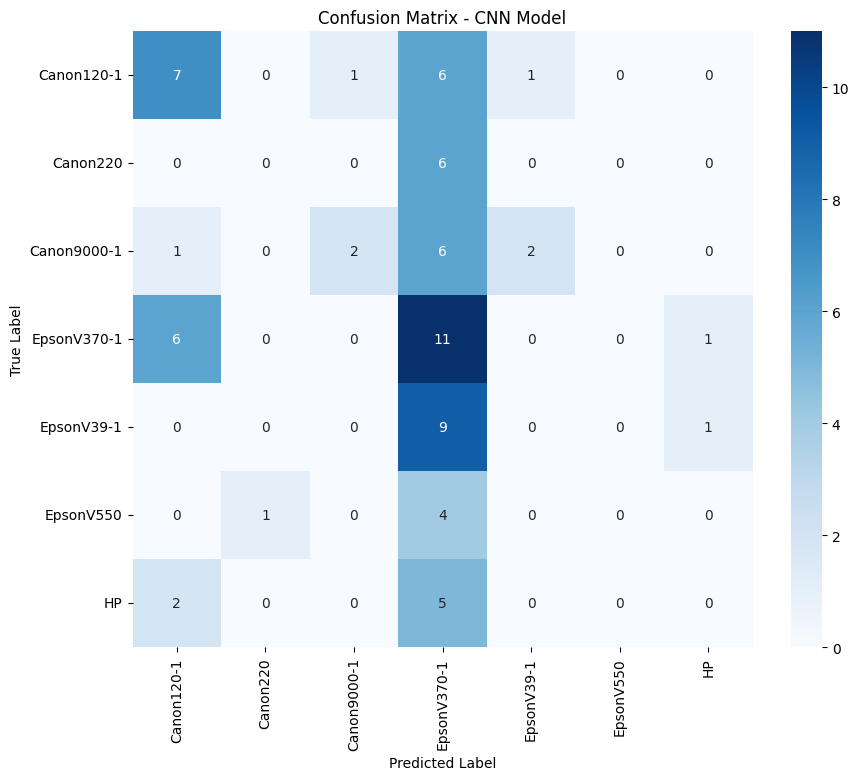



--- Applying Grad-CAM for Explainability ---
Automatically found last convolutional layer: 'conv2d_1'

Analyzing a sample image with true label: 'HP'


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 128, 128, 1))
  warnings.warn(msg)


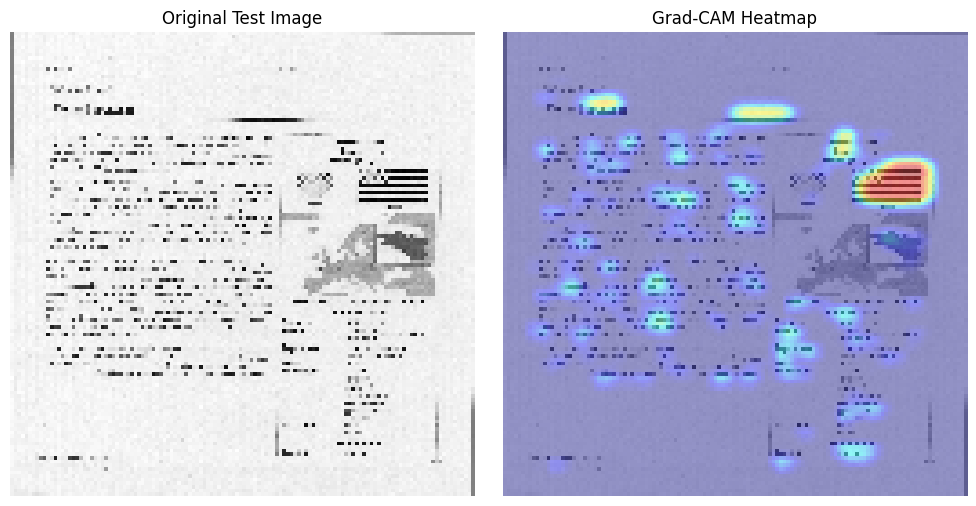


--- Week 6 Complete ---


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model

# This script assumes 'model', 'X_test', 'y_test', and 'le' are in memory.

print("--- Starting Milestone 3, Week 6 ---")

# --- Task 1: Detailed Model Evaluation ---
print("\n--- Generating Detailed Performance Report for the CNN ---")
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_, zero_division=0))
print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - CNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Task 2: Explainability with Grad-CAM ---
print("\n\n--- Applying Grad-CAM for Explainability ---")
def get_grad_cam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = Model(inputs=[model.input], outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + tf.keras.backend.epsilon())
    return heatmap.numpy()

last_conv_layer_name = ""
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break
print(f"Automatically found last convolutional layer: '{last_conv_layer_name}'")

sample_index = 10
sample_img_array = X_test[sample_index]
img_for_display = (sample_img_array * 255).astype(np.uint8).squeeze()

if last_conv_layer_name:
    heatmap = get_grad_cam_heatmap(np.expand_dims(sample_img_array, axis=0), model, last_conv_layer_name)
    heatmap = cv2.resize(heatmap, (img_for_display.shape[1], img_for_display.shape[0]))
    heatmap = (heatmap * 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # ✅ FIX: Convert the single-channel grayscale image to a 3-channel BGR image
    img_for_display_color = cv2.cvtColor(img_for_display, cv2.COLOR_GRAY2BGR)

    # Now, both images have 3 channels and can be blended
    superimposed_img = cv2.addWeighted(img_for_display_color, 0.6, heatmap, 0.4, 0)

    sample_label_name = le.classes_[np.argmax(y_test[sample_index])]
    print(f"\nAnalyzing a sample image with true label: '{sample_label_name}'")
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_for_display, cmap='gray')
    plt.title("Original Test Image")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    # Convert back to RGB for correct display in Matplotlib
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Could not find a convolutional layer for Grad-CAM.")

print("\n--- Week 6 Complete ---")

In [ ]:
# This script assumes 'rf_model' and 'le' from your Week 4 run are in memory.
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'randomforest_model.joblib')

# Save the label encoder
joblib.dump(le, 'labelencoder.joblib')

print("Successfully saved 'randomforest_model.joblib' and 'labelencoder.joblib'.")
print("Please download these two files from the Colab file browser (left-hand side).")

Successfully saved 'randomforest_model.joblib' and 'labelencoder.joblib'.
Please download these two files from the Colab file browser (left-hand side).


In [ ]:
import pandas as pd
import os
from google.colab import drive
from tqdm import tqdm

# --- Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)

# --- CONFIGURATION ---
PROJECT_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER"

# ✅ UPDATED PATH: Path to the folder containing your AUTHENTIC scanner folders.
AUTHENTIC_IMAGES_PATH = os.path.join(PROJECT_PATH, "SUPATLANTIQUE")

# ✅ UPDATED PATH: Path to the folder containing your clean TAMPERED images.
TAMPERED_IMAGES_PATH = os.path.join(PROJECT_PATH, "Tamperedimg")
# ==================================================================================

print("--- Creating the Final Combined Dataset for the Project ---")

file_paths = []
labels = []

# --- Process AUTHENTIC Scanner Images ---
print("\nScanning for Authentic scanner images...")
for dirpath, dirnames, filenames in tqdm(os.walk(AUTHENTIC_IMAGES_PATH)):
    scanner_model_label = os.path.basename(dirpath)
    # Ensure we are in a scanner subfolder (e.g., 'HP', 'Canon120-1')
    if scanner_model_label != "SUPATLANTIQUE":
        for filename in filenames:
            if filename.lower().endswith(('.tif', '.tiff', '.png', '.jpg')):
                full_path = os.path.join(dirpath, filename)
                file_paths.append(full_path)
                labels.append(scanner_model_label) # The label is the scanner name

# --- Process TAMPERED Images ---
print("\nScanning for Tampered images...")
# Since you've reorganized, we can just scan the main tampered folder
for filename in tqdm(os.listdir(TAMPERED_IMAGES_PATH)):
    if filename.lower().endswith(('.tif', '.tiff', '.png', '.jpg')):
        full_path = os.path.join(TAMPERED_IMAGES_PATH, filename)
        file_paths.append(full_path)
        labels.append("Tampered") # The label for all of these is "Tampered"

# Create the final DataFrame
df = pd.DataFrame({'file_path': file_paths, 'label': labels})

# Save the new final CSV
csv_path = os.path.join(PROJECT_PATH, "finale_dataset.csv")
df.to_csv(csv_path, index=False)

print(f"\nScan complete. Created 'finale_dataset.csv' with {len(df)} total images.")
print("\nFinal class distribution:")
print(df['label'].value_counts())

print("\n--- Final Data Preparation Complete ---")

Mounted at /content/drive
--- Creating the Final Combined Dataset for the Project ---

Scanning for Authentic scanner images...


10it [00:00, 1002.63it/s]



Scanning for Tampered images...


100%|██████████| 35/35 [00:00<00:00, 230095.05it/s]


Scan complete. Created 'finale_dataset.csv' with 393 total images.

Final class distribution:
label
EpsonV370-1    88
Canon120-1     73
Canon9000-1    56
EpsonV39-1     52
Tampered       35
HP             34
Canon220       31
EpsonV550      24
Name: count, dtype: int64

--- Final Data Preparation Complete ---


In [ ]:
# First, install the necessary libraries for PDF conversion
!pip install pdf2image
!apt-get install -y poppler-utils

import pandas as pd
import os
from google.colab import drive
from tqdm import tqdm
from pdf2image import convert_from_path

# --- Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)

# --- CONFIGURATION ---
PROJECT_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER"

AUTHENTIC_IMAGES_PATH = os.path.join(PROJECT_PATH, "SUPATLANTIQUE", "Flatfield")
ORIGINAL_PDF_PATH = os.path.join(PROJECT_PATH, "originalimg")

# ✅ FIX: PASTE THE CORRECT PATH TO YOUR TAMPERED IMAGES FOLDER HERE
TAMPERED_IMAGES_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER/Tamperedimg"

CONVERTED_PDF_PATH = os.path.join(PROJECT_PATH, "ORIGINAL_PDF_CONVERTED_IMAGES")
os.makedirs(CONVERTED_PDF_PATH, exist_ok=True)
# ==================================================================================

print("--- Creating the Final 3-Category Dataset ---")

file_paths = []
labels = []

# --- 1. Process AUTHENTIC Scanner Images ---
print("\nScanning for Authentic scanner images...")
for dirpath, dirnames, filenames in tqdm(os.walk(AUTHENTIC_IMAGES_PATH)):
    label = os.path.basename(dirpath)
    if label != "Flatfield":
        for filename in filenames:
            if filename.lower().endswith(('.tif', '.tiff', '.png', '.jpg')):
                file_paths.append(os.path.join(dirpath, filename))
                labels.append(label)

# --- 2. Process TAMPERED Images ---
print("\nScanning for Tampered images...")
for dirpath, dirnames, filenames in tqdm(os.walk(TAMPERED_IMAGES_PATH)):
    if 'Binary masks' in dirpath: continue
    for filename in filenames:
        if filename.lower().endswith(('.tif', '.tiff', '.png', '.jpg')):
            file_paths.append(os.path.join(dirpath, filename))
            labels.append("Tampered")

# --- 3. Process ORIGINAL PDF Images ---
print("\nScanning and converting Original PDFs...")
for filename in tqdm(os.listdir(ORIGINAL_PDF_PATH)):
    if filename.lower().endswith('.pdf'):
        pdf_path = os.path.join(ORIGINAL_PDF_PATH, filename)
        try:
            pages = convert_from_path(pdf_path, 300)
            for i, page in enumerate(pages):
                new_image_name = f"{os.path.splitext(filename)[0]}_page_{i+1}.png"
                new_image_path = os.path.join(CONVERTED_PDF_PATH, new_image_name)
                page.save(new_image_path, 'PNG')
                file_paths.append(new_image_path)
                labels.append("Original")
        except Exception as e:
            print(f"\nCould not process PDF {pdf_path}. Error: {e}")

# Create the final DataFrame
df = pd.DataFrame({'file_path': file_paths, 'label': labels})

# Save the new final CSV
csv_path = os.path.join(PROJECT_PATH, "final_dataset_v2.csv")
df.to_csv(csv_path, index=False)

print(f"\nScan complete. Created 'final_dataset_v2.csv' with {len(df)} total images.")
print("\nFinal class distribution:")
print(df['label'].value_counts())

print("\n--- Final Data Preparation Complete ---")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.10).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Mounted at /content/drive
--- Creating the Final 3-Category Dataset ---

Scanning for Authentic scanner images...


9it [00:00, 482.36it/s]



Scanning for Tampered images...


1it [00:00, 230.76it/s]



Scanning and converting Original PDFs...


100%|██████████| 204/204 [02:54<00:00,  1.17it/s]


Scan complete. Created 'final_dataset_v2.csv' with 597 total images.

Final class distribution:
label
Original       204
EpsonV370-1     88
Canon120-1      73
Canon9000-1     56
EpsonV39-1      52
Tampered        35
HP              34
Canon220        31
EpsonV550       24
Name: count, dtype: int64

--- Final Data Preparation Complete ---


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from google.colab import drive
from skimage.feature import local_binary_pattern
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

# --- Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)

# --- CONFIGURATION ---
PROJECT_PATH = "/content/drive/MyDrive/SUPERLANTIQUE_FOLDER"
IMG_SIZE = 256
# ===================================================================================

print("--- Training Final Super-Model on 3 Categories ---")

def extract_lbp_features(image_path):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None: return None
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        radius = 3
        n_points = 8 * radius
        lbp = local_binary_pattern(img_resized, n_points, radius, method='uniform')
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        return hist
    except Exception as e:
        return None

# --- Script Execution ---
csv_path = os.path.join(PROJECT_PATH, "final_dataset_v2.csv")
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} records from the final dataset.")

print("\nExtracting features from all images...")
features_list = []
labels_list = []
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    features = extract_lbp_features(row['file_path'])
    if features is not None:
        features_list.append(features)
        labels_list.append(row['label'])

X = np.array(features_list)
y = np.array(labels_list)
print(f"\nSuccessfully processed {len(X)} images.")

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded)
print(f"Data split into {len(X_train)} training and {len(X_test)} testing samples.")

print("\nTraining the Final Random Forest model...")
final_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)

print("Evaluating final model performance...")
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- FINAL MODEL RESULTS ---")
print(f"Final Model Accuracy: {accuracy * 100:.2f}%")

# --- Save the Final Model ---
print("\nSaving final model and label encoder...")
joblib.dump(final_model, os.path.join(PROJECT_PATH, 'final_model_v2.joblib'))
joblib.dump(le, os.path.join(PROJECT_PATH, 'final_label_encoder_v2.joblib'))
print("Files saved successfully. Please download these new v2 files.")

Mounted at /content/drive
--- Training Final Super-Model on 3 Categories ---
Loaded 597 records from the final dataset.

Extracting features from all images...


100%|██████████| 597/597 [12:20<00:00,  1.24s/it]



Successfully processed 596 images.
Data split into 476 training and 120 testing samples.

Training the Final Random Forest model...
Evaluating final model performance...

--- FINAL MODEL RESULTS ---
Final Model Accuracy: 84.17%

Saving final model and label encoder...
Files saved successfully. Please download these new v2 files.
